<a href="https://colab.research.google.com/github/maha-rw/Handwritten-Digits-Recognition-in-Both-Arabic-and-English/blob/main/Handwritten_Digits_Recognition_Model_3___SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwritten Digits Recognition - Model #3 : SVM**

# **Notebook Introduction**

 This notebook aims to utilize a SVM for the task of recognizing handwritten digits. The objective of this project is to develop a machine learning model that can accurately classify images of handwritten digits into their respective numeric values.


*  This notebook is divided into two main sections:
   1.   Arabic Dataset
   2.   English Dataset



*  both datasets have identical code in hyperparameter tuning but differ in loading the data due to different conditions of datsets files.


*  To run the desired dataset, execute the section dedicated to it.




## Import libraries

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn import svm

from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from google.colab import drive



# Dataset 1: Arabic Dataset

Arabic handwritten digits database contains 60,000 training images, and 10,000 test images. MADBase were written by 700 writers. Each writer wrote each digit (from 0 -9) ten times. To ensure including different writing styles, the database was gathered from different institutions: Colleges of Engineering and Law, School of Medicine, the Open University (whose students span a wide range of ages), a high school, and a governmental institution.

find the data here: *https://www.kaggle.com/datasets/mloey1/ahdd1*


### Loading the dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
X_train = pd.read_csv("/content/drive/MyDrive/Handwritten Digits Recognition Project/Group4-Datasets/csvTrainImages 60k x 784.csv").values
Y_train = pd.read_csv("/content/drive/MyDrive/Handwritten Digits Recognition Project/Group4-Datasets/csvTrainLabel 60k x 1.csv").values
X_test = pd.read_csv("/content/drive/MyDrive/Handwritten Digits Recognition Project/Group4-Datasets/csvTestImages 10k x 784.csv").values
Y_test = pd.read_csv("/content/drive/MyDrive/Handwritten Digits Recognition Project/Group4-Datasets/csvTestLabel 10k x 1.csv").values
print (X_train.shape )
print (Y_train.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(59999, 784)
(59999, 1)


The input data is currently in a flattened format with 784 pixel values per sample. To prepare the data for image processing tasks, it needs to be **reshaped** into a 1D format, where each sample is represented as a vector of 784 elements. Reshaping the data allows us to match the expected input shape of models that analyze images

We need to **normalize** the pixel values of the images to a range between 0 and 1. To achieve this, we divide the pixel values by 255, which is the maximum pixel value. Normalization is necessary to ensure that all pixel values are within a consistent and standardized range. This helps the model learn more effectively and improves convergence during training.

In [ ]:

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

#reshape data

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


Y_train = Y_train.reshape( -1)

# Print the shapes of the datasets
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (59999, 784)
Test set shape: (9999, 784)



### Dimension reduction using PCA

The plot below show how much of the variance in the data is captured as the number of components increases. We utilize the elbow point to assess the best number of components which was around 150.

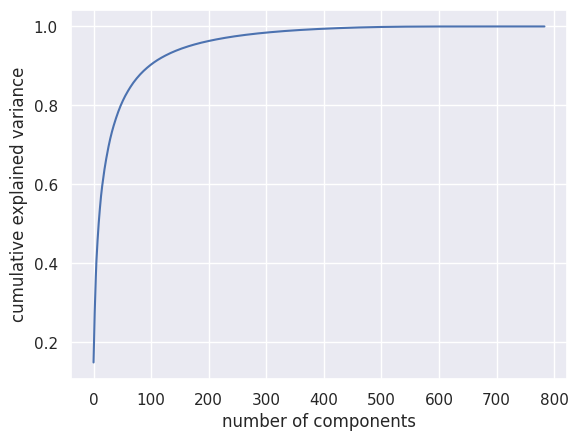

In [ ]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Model training



*   Create a PCA model
*   Create an SVM model with RBF as kerel
* Create a pipeline that combines the PCA and SVM models
* Predict the test data using the model



**Training without optimal hyperparameter**

In [ ]:
pca = PCA(150).fit(X_train)
rbf = svm.SVC(kernel='rbf', gamma=0.005, C=5).fit(X_train, Y_train)
model = make_pipeline(pca, rbf)
rbf_pred = rbf.predict(X_test)

In [ ]:
rbf_accuracy = accuracy_score(Y_test, rbf_pred)
rbf_f1 = f1_score(Y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  98.19
F1 (RBF Kernel):  98.19


### Hyperparameter tuning

In [ ]:
param_grid = {'svc__C': [1, 5, 10],
              'svc__gamma': [0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid, verbose=2)

%time grid.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time= 2.2min
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time= 2.2min
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time= 2.2min
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time= 2.0min
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time= 2.0min
[CV] END .........................svc__C=1, svc__gamma=0.001; total time= 1.5min
[CV] END .........................svc__C=1, svc__gamma=0.001; total time= 1.5min
[CV] END .........................svc__C=1, svc__gamma=0.001; total time= 1.6min
[CV] END .........................svc__C=1, svc__gamma=0.001; total time= 1.5min
[CV] END .........................svc__C=1, svc__gamma=0.001; total time= 1.4min
[CV] END .........................svc__C=1, svc__gamma=0.005; total time=  55.3s
[CV] END .........................svc__C=1, svc__

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(n_components=150)),
                                       ('svc', SVC(C=5, gamma=0.005))]),
             param_grid={'svc__C': [1, 5, 10],
                         'svc__gamma': [0.0005, 0.001, 0.005]},
             verbose=2)

In [ ]:
print(f'Best parameters are: {grid.best_params_}')
mean_score = grid.cv_results_['mean_test_score']
std_score = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean,std,params in zip(mean_score,std_score,params):
      print(f'{round(mean,2)} + or -{round(std,2)} for the {params}')

Best parameters are: {'svc__C': 10, 'svc__gamma': 0.005}
0.97 + or -0.0 for the {'svc__C': 1, 'svc__gamma': 0.0005}
0.97 + or -0.0 for the {'svc__C': 1, 'svc__gamma': 0.001}
0.98 + or -0.0 for the {'svc__C': 1, 'svc__gamma': 0.005}
0.97 + or -0.0 for the {'svc__C': 5, 'svc__gamma': 0.0005}
0.98 + or -0.0 for the {'svc__C': 5, 'svc__gamma': 0.001}
0.98 + or -0.0 for the {'svc__C': 5, 'svc__gamma': 0.005}
0.98 + or -0.0 for the {'svc__C': 10, 'svc__gamma': 0.0005}
0.98 + or -0.0 for the {'svc__C': 10, 'svc__gamma': 0.001}
0.99 + or -0.0 for the {'svc__C': 10, 'svc__gamma': 0.005}


**Train with optimal hyperparameter**

In [ ]:
model = grid.best_estimator_
ypred = model.predict(X_test)

##calculate and print the accuracy and f1 scores for SVM with best RBF kernel:
bestRBF_accuracy = accuracy_score(Y_test, ypred)
bestRBF_f1 = f1_score(Y_test, ypred, average='weighted')
print('Accuracy (Best RBF Kernel): ', "%.2f" % (bestRBF_accuracy*100))
print('F1 (Best RBF Kernel): ', "%.2f" % (bestRBF_f1*100))

Accuracy (Best RBF Kernel):  98.28
F1 (Best RBF Kernel):  98.28


### Evaluation

In [ ]:
print(classification_report(Y_test, ypred
                            ))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       999
           1       0.98      0.99      0.98      1000
           2       0.96      0.98      0.97      1000
           3       0.99      0.98      0.99      1000
           4       0.99      0.97      0.98      1000
           5       0.98      0.97      0.97      1000
           6       0.99      0.99      0.99      1000
           7       0.99      0.99      0.99      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.98      0.98      1000

    accuracy                           0.98      9999
   macro avg       0.98      0.98      0.98      9999
weighted avg       0.98      0.98      0.98      9999



Based on the high values of accuracy, precision, and recall (0.98), we can conclude that the SVM model performs exceptionally well on the given dataset. The model demonstrates a high level of accuracy in correctly predicting both positive and negative instances, with a precision of 0.98, indicating a low rate of false positives. Additionally, the recall value of 0.98 suggests that the model effectively captures a significant proportion of positive instances from the dataset. These results indicate that the model shows robust performance and can be considered highly reliable for the given task of classifiying handwritten digits images.


---

The heatmap below shows that most of the data was correctly classified, but 0 and 5 were classified incorrectly due to their shape being similar in some cases by people's handwriting.




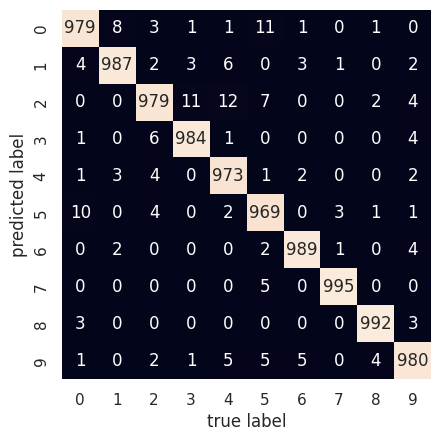

In [ ]:
mat = confusion_matrix(Y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

# Dataset 2: English Dataset

One issue we encountered with the English dataset is that it is divided into two separate files: one for training and one for testing. However, the testing file is missing the corresponding labels, making it impossible to accurately measure the performance of our model without knowing the true values. To address this problem, we have made the decision to utilize only the training set. We will further divide this training set into training, validation, and testing subsets. By doing so, we can overcome the issue of missing labels in the original testing file and ensure that we have reliable performance metrics for evaluating our model's effectiveness. This approach allows us to assess our model's performance accurately.


find the data here: *https://www.kaggle.com/competitions/digit-recognizer/data*

### Loading dataset

In [ ]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Handwritten Digits Recognition Project/Group4-Datasets/E-train.csv')
print (data.shape ) #(42000, 785)


# Assuming 'data' contains your DataFrame
total_null_count = data.isnull().sum().sum()

print("Total Number of Null Values:", total_null_count)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(41995, 785)
Total Number of Null Values: 0


The input data is currently in a flattened format with 784 pixel values per sample. To prepare the data for image processing tasks, it needs to be **reshaped** into a 1D format, where each sample is represented as a vector of 784 elements. Reshaping the data allows us to match the expected input shape of models that analyze images

We need to **normalize** the pixel values of the images to a range between 0 and 1. To achieve this, we divide the pixel values by 255, which is the maximum pixel value. Normalization is necessary to ensure that all pixel values are within a consistent and standardized range. This helps the model learn more effectively and improves convergence during training.

In [ ]:
# Assuming 'data' contains your loaded DataFrame
X = data.drop('label', axis=1)  # Features (input)
y = data['label']  # Labels (output)

# Normalize the image data by dividing by 255
X_normalized = X / 255.0


# Split the normalized and reshaped data into train, validation, and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X_normalized, y,random_state=42)#


print("Shapes:")
print("X_train:", xtrain.shape)
print("X_test:", xtest.shape)
print("y_train:", ytrain.shape)

print("y_test:", ytest.shape)

Shapes:
X_train: (31500, 784)
X_test: (10500, 784)
y_train: (31500,)
y_test: (10500,)


### Dimension reduction using PCA

The plot below show how much of the variance in the data is captured as the number of components increases. We utilize the elbow point to assess the best number of components which was around 150.

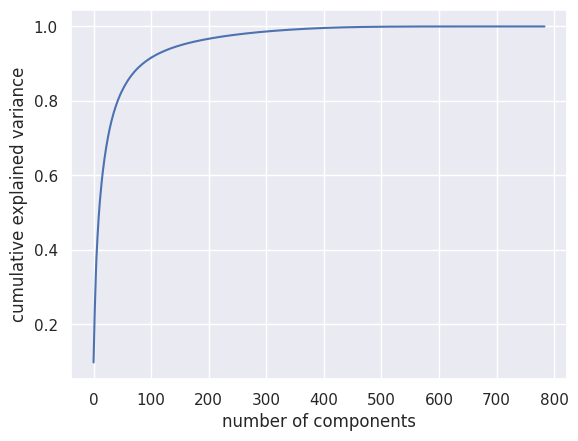

In [ ]:
pca = PCA().fit(xtrain)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Model training

*   Create a PCA model
*   Create an SVM model with RBF as kerel
* Create a pipeline that combines the PCA and SVM models
* Predict the test data using the model


**Train Dataset without optimal hyperparameter**

In [ ]:
pca = PCA(100).fit(xtrain)
rbf_pca = svm.SVC(kernel='rbf', gamma=0.005, C=5).fit(xtrain, ytrain)
model = make_pipeline(pca, rbf_pca)

rbf_pca_pred = rbf_pca.predict(xtest)

In [ ]:
##calculate and print the accuracy and f1 scores for SVM with RBF kernel:
rbf_pca_accuracy = accuracy_score(ytest, rbf_pca_pred)
rbf_pca_f1 = f1_score(ytest, rbf_pca_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_pca_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_pca_f1*100))

Accuracy (RBF Kernel):  97.18
F1 (RBF Kernel):  97.18


### Hyperparameter Tuning

In [ ]:
param_grid = {'svc__C': [1, 5, 10],
              'svc__gamma': [0.0005, 0.001, 0.005]}



grid = GridSearchCV(model, param_grid, verbose=2)


%time grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time=  44.0s
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time=  41.0s
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time=  44.0s
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time=  40.3s
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time=  43.0s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  34.5s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  31.0s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  29.7s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  30.2s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  31.7s
[CV] END .........................svc__C=1, svc__gamma=0.005; total time=  19.2s
[CV] END .........................svc__C=1, svc__

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(n_components=100)),
                                       ('svc', SVC(C=5, gamma=0.005))]),
             param_grid={'svc__C': [1, 5, 10],
                         'svc__gamma': [0.0005, 0.001, 0.005]},
             verbose=2)

In [ ]:
print(f'Best parameters are: {grid.best_params_}')
mean_score = grid.cv_results_['mean_test_score']
std_score = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean,std,params in zip(mean_score,std_score,params):
      print(f'{round(mean,2)} + or -{round(std,2)} for the {params}')

Best parameters are: {'svc__C': 10, 'svc__gamma': 0.005}
0.92 + or -0.0 for the {'svc__C': 1, 'svc__gamma': 0.0005}
0.93 + or -0.0 for the {'svc__C': 1, 'svc__gamma': 0.001}
0.96 + or -0.0 for the {'svc__C': 1, 'svc__gamma': 0.005}
0.93 + or -0.0 for the {'svc__C': 5, 'svc__gamma': 0.0005}
0.94 + or -0.0 for the {'svc__C': 5, 'svc__gamma': 0.001}
0.97 + or -0.0 for the {'svc__C': 5, 'svc__gamma': 0.005}
0.94 + or -0.0 for the {'svc__C': 10, 'svc__gamma': 0.0005}
0.95 + or -0.0 for the {'svc__C': 10, 'svc__gamma': 0.001}
0.97 + or -0.0 for the {'svc__C': 10, 'svc__gamma': 0.005}


**Train model with optimal hyperparameter**

In [ ]:
model = grid.best_estimator_
ypred = model.predict(xtest)

##calculate and print the accuracy and f1 scores for SVM with best RBF kernel:
bestRBF_accuracy = accuracy_score(ytest, ypred)
bestRBF_f1 = f1_score(ytest, ypred, average='weighted')
print('Accuracy (Best RBF Kernel): ', "%.2f" % (bestRBF_accuracy*100))
print('F1 (Best RBF Kernel): ', "%.2f" % (bestRBF_f1*100))

Accuracy (Best RBF Kernel):  97.53
F1 (Best RBF Kernel):  97.53


### Evaluation

In [ ]:
print(classification_report(ytest, ypred
                            ))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1025
           1       0.98      0.99      0.99      1146
           2       0.98      0.97      0.97      1072
           3       0.97      0.97      0.97      1151
           4       0.97      0.97      0.97      1024
           5       0.97      0.96      0.97       898
           6       0.98      0.99      0.98      1010
           7       0.98      0.97      0.98      1135
           8       0.98      0.98      0.98      1005
           9       0.96      0.96      0.96      1034

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500



Based on the high values of accuracy, precision, and recall (0.98), we can conclude that the SVM model performs exceptionally well on the given dataset. The model demonstrates a high level of accuracy in correctly predicting both positive and negative instances, with a precision of 0.98, indicating a low rate of false positives. Additionally, the recall value of 0.98 suggests that the model effectively captures a significant proportion of positive instances from the dataset. These results indicate that the model shows robust performance and can be considered highly reliable for the given task of classifiying handwritten digits images.


---

The heatmap below shows that most of the data was correctly classified, but 4 and 9 were classified incorrectly due to their shape being similar in some cases by people's handwriting.

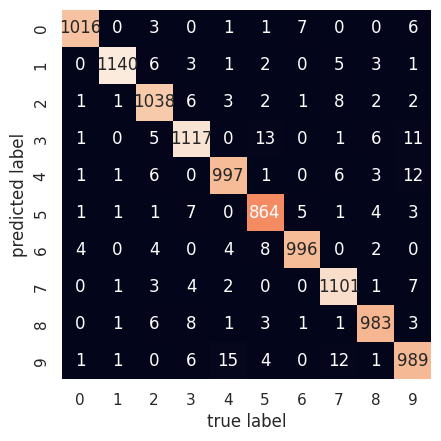

In [ ]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

# **Summary**

In conclusion the SVM model with PCA as feature extraction has preformed amazingly well on both datasets with Arabic dataset having higher accuracy due to the fact that the English dataset missing the test labels which led us to split the train dataset having a less examples to experiment with.